In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv('Customer_Data.csv')

In [17]:
df.head()

,CustomerID,Age,Gender,MembershipType,LastPurchaseAmount,AvgResponseTime,NumSupportTickets,Satisfaction
0,C0001,58,Female,Silver,1678,5.0,3,Satisfied
1,C0002,48,Male,Bronze,1376,3.7,3,Unsatisfied
2,C0003,34,Female,Silver,1458,4.0,3,Unsatisfied
3,C0004,27,Female,Silver,580,2.0,4,Satisfied
4,C0005,40,Female,Bronze,1544,4.7,1,Satisfied


In [18]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
df['Satisfaction'] = df['Satisfaction'].map({'Satisfied':1, 'Unsatisfied':0})

In [19]:
#get_dummies()
df = pd.get_dummies(df, columns=['MembershipType'], drop_first=True, dtype=int, prefix=['Member'], prefix_sep='_')

In [20]:
df.head()

,CustomerID,Age,Gender,LastPurchaseAmount,AvgResponseTime,NumSupportTickets,Satisfaction,Member_Gold,Member_Silver
0,C0001,58,1,1678,5.0,3,1,0,1
1,C0002,48,0,1376,3.7,3,0,0,0
2,C0003,34,1,1458,4.0,3,0,0,1
3,C0004,27,1,580,2.0,4,1,0,1
4,C0005,40,1,1544,4.7,1,1,0,0


In [22]:
df.drop(columns='CustomerID').head()

,Age,Gender,LastPurchaseAmount,AvgResponseTime,NumSupportTickets,Satisfaction,Member_Gold,Member_Silver
0,58,1,1678,5.0,3,1,0,1
1,48,0,1376,3.7,3,0,0,0
2,34,1,1458,4.0,3,0,0,1
3,27,1,580,2.0,4,1,0,1
4,40,1,1544,4.7,1,1,0,0


In [23]:
#Normalize numerical features

In [24]:
feature_to_scale = ['Age', 'LastPurchaseAmount', 'AvgResponseTime', 'NumSupportTickets']
scaler = StandardScaler()
df[feature_to_scale] = scaler.fit_transform(df[feature_to_scale])

In [25]:
df.head()

,CustomerID,Age,Gender,LastPurchaseAmount,AvgResponseTime,NumSupportTickets,Satisfaction,Member_Gold,Member_Silver
0,C0001,1.532070,1,1.153676,1.764811,-0.525765,1,0,1
1,C0002,0.675751,0,0.628143,0.761522,-0.525765,0,0,0
2,C0003,-0.523097,1,0.770837,0.993050,-0.525765,0,0,1
3,C0004,-1.122521,1,-0.757037,-0.550471,-0.185243,1,0,1
4,C0005,-0.009305,1,0.920492,1.533283,-1.206807,1,0,0


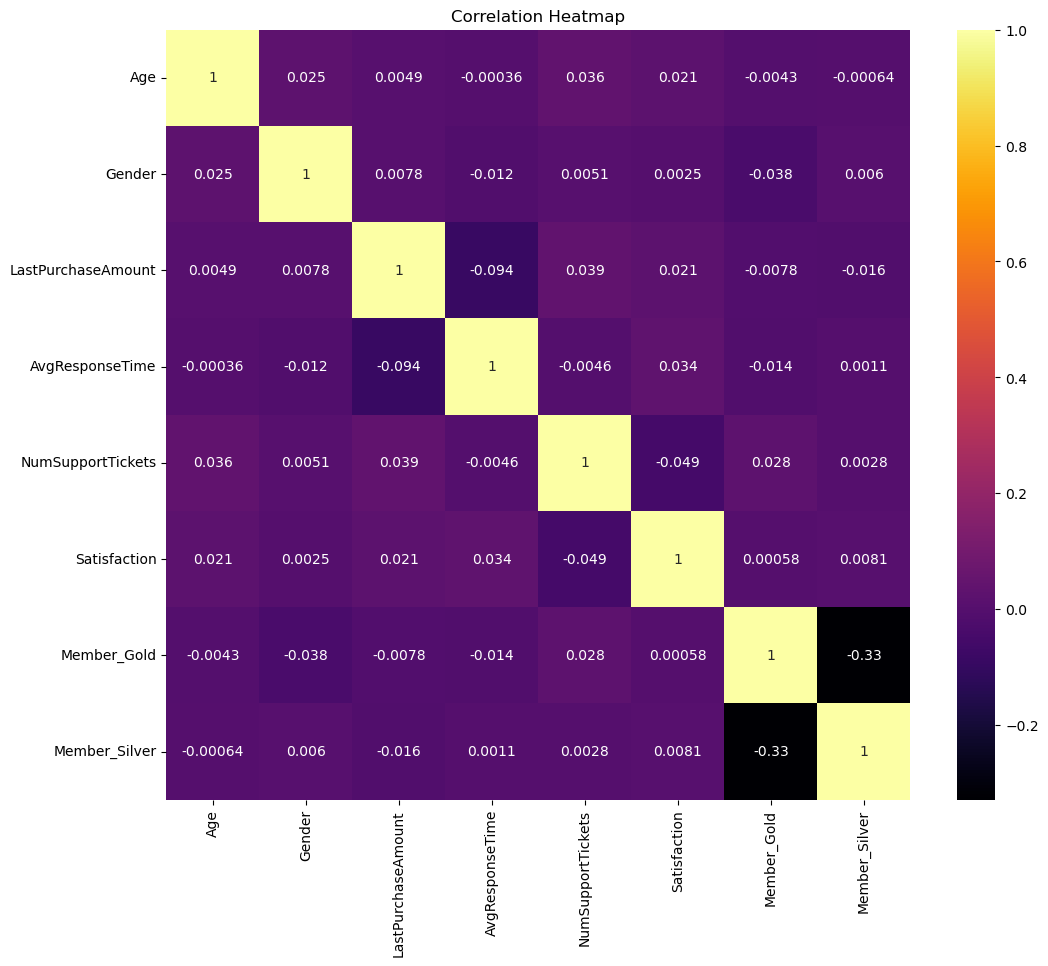

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='inferno')
plt.title('Correlation Heatmap')
plt.show()

Text(0, 0.5, 'Count')

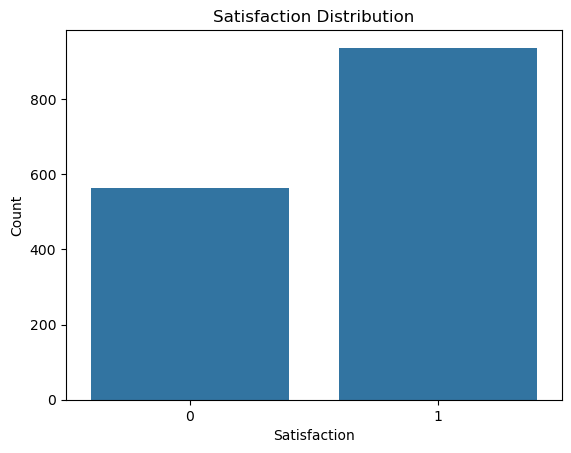

In [40]:
sns.countplot(x='Satisfaction', data=df)
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Count')

In [41]:
#Data Splitting

In [42]:
from sklearn.model_selection import train_test_split

In [49]:
X = df.drop(columns=['Satisfaction'])
y = df['Satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
logModel = LogisticRegression()
logModel.fit(X_train, y_train)

LogisticRegression()

In [63]:
y_pred = log_model.predict(X_test)

In [64]:
print('Logistic Regression Accuracy: ', accuracy_score(y_test, y_pred))

Logistic Regression Accuracy:  0.6222222222222222


In [65]:
print('Classification Report: ', classification_report(y_test, y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00       170
           1       0.62      1.00      0.77       280

    accuracy                           0.62       450
   macro avg       0.31      0.50      0.38       450
weighted avg       0.39      0.62      0.48       450



/Users/nareshdhami/Desktop/MachineLearning/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nareshdhami/Desktop/MachineLearning/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nareshdhami/Desktop/MachineLearning/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Text(50.722222222222214, 0.5, 'Actual')

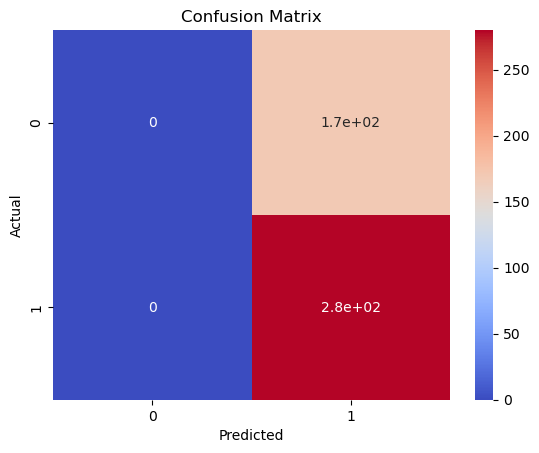

In [66]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

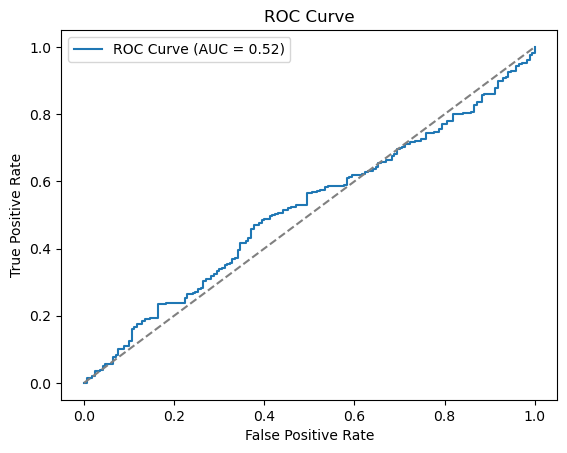

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve
y_prob = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
